# **Mini Project 1 : Exploratory Data Analysis**
Ben Heinze, Braxton McCormack, Michael Hagin \
16 February 2024 \
CSCI 347 - Datamining

---

### Dataset Used
* [Student Performance Dataset](https://archive.ics.uci.edu/dataset/320/student+performance)

### Helpful Links

* [Pandas Frame Documentation](https://pandas.pydata.org/docs/reference/frame.html)
* [Markdown Format Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

---
## **Part 1 - Introduction**

In a well-written paragraph, answer the following questions about the data:

### Scoring

[4 points] What was the data used for?

[2 points] Who (or what organization) uploaded the data?

[5 points] How many attributes and how many entities are represented in the data?
* number of numerical attributes:
* number of categorical attributes:
    * Would you suggest that each categorical attribute be label-encoded or one-hot-encoded and why?

[4 points] Are there missing values in the data? If so, what proportion of the data is missing
overall? What proportion of data is missing per attribute (you may use a plot or table to
summarize this information)?

[7 points] Why is this data set interesting to you?

[6 points] Of the attributes used to describe this data, which do you think are the most
descriptive of the data and why (before doing any data analysis) ?

---

This paper aims to deep dive into the analysis of the Student Performance database, which was provided by Paulo Cortez in 2014. Through real world data gathered through school reports and questionaires from two schools, this dataset seeks to understand how socioeconomic status contributes to high failure rates in Portugal. Cortez created two different datasets; one focuses on Mathematics and the other Portuguese. Our paper will focus on Mathematics dataset for this mini project. 

Including the three target variables, there are 33 total attributes with 16 numerical features and 17 categorical features. We opted for one-hot encoding beacuse the categorical variables are either mostly binary, which only has two categories, or nomial, which has no inherit order. Label encoding is preferred when there is a large number of categories and they are ordinal.

Due to the data being directly derived from school records and surveys,no value is missing from this dataset.

The exploration of the Student Performance dataset interested us because of the socioeconomic questions that correlate with a child's school performance and their at-home environment. We expect students with worse family evironments to be correlated with low school performance.


Prior to any data anaylysis, we believe the most descriptive variabes in regards to student performance are the data attributes involving family environment and economic status. This list includes variables like father and mother workday alcohol consumption, mother and father education, and  whether the student is in extra paid classes or is in extra-curricular activities. By analysising and predicting which students are more likely to fail,  methods that reduce student failure can be reasearched and applied to students in need.



---

## **Part 2 - Data Analysis Code**

Use Python to write the following functions, without using any functions with the same purpose
in sklearn, pandas, numpy, or any other library (though you may want to use these libraries to
check your answers)

In [1]:
import numpy as np

[5 points] A function that will compute the mean of a numerical, multidimensional data set
input as a 2-dimensional numpy array

In [2]:
def multi_mean(twoD):
    mean = []
    calc = 0
    count = 0
    
    for i in range(len(twoD[0])):
        calc = 0
        count = 0
        for j in range(len(twoD)):
            count += 1
            calc += twoD[j][i]

        calc = calc/count   
        mean.append(calc)
    return mean

[5 points] A function that will compute the sample covariance between two attributes that are
input as one-dimensional numpy vectors

In [3]:
def sample_cov(attribute1, attribute2):
    total = 0
    avg1 = np.mean(attribute1)
    avg2 = np.mean(attribute2)

    for i in range(len(attribute1 - 1)):
        total += ((attribute1[i] - avg1) * (attribute2[i] - avg2))
        
    cov = total/(len(attribute1) - 1)
    return cov

[5 points] A function that will compute the correlation between two attributes that are input as two numpy vectors.

In [4]:
def corr(vector1, vector2):
    SD1 = np.std(vector1)
    SD2 = np.std(vector2)

    corr = sample_cov(vector1, vector2)/(((sample_cov(vector1, vector1) * sample_cov(vector2, vector2))**.5))

    return corr

[5 points] A function that will normalize the attributes in a two-dimensional numpy array using range normalization.

In [5]:
# def range_norm(twoD):
#     mean = multi_mean(twoD)
#     normalized_num = 0
#     normalized = []
#     norm_part = []
#     count = 0

#     for i in range(len(twoD)):
#         for j in range(len(twoD[0])):
#             norm_part.append(twoD[i][j] - mean[j])
#             count += 1
#             if count == len(twoD[0]):
#                 normalized.append(norm_part)
#                 count = 0
#                 norm_part = []

#     return normalized
    
# att1 = [1, 3, 5]
# att1 = np.array(att1)

# att2 = [5, 10, 15]
# att2 = np.array(att2)

# """vec1 = [1, 5]
# vec1 = np.array(vec1)

# vec2 = [3, 10]
# vec2 = np.array(vec2)"""

# #print(multi_mean(a))
# #print(sample_cov(att1, att2))
# #print(corr(att1, att2))
# print(range_norm(a))



In [6]:
#[5 points] A function that will compute the mean of a numerical, multidimensional data set input as a 2-dimensional numpy array
def mean_of_dataset(dataset):
    """Compute the mean of a numerical, multidimensional dataset."""
    sum_data = [sum(column) for column in zip(*dataset)]
    means = [sum_val / len(dataset) for sum_val in sum_data]
    return means
#[5 points] A function that will compute the sample covariance between two attributes that are input as one-dimensional numpy vectors
def sample_covariance(vector1, vector2):
    """Compute the sample covariance between two attributes."""
    mean1 = sum(vector1) / len(vector1)
    mean2 = sum(vector2) / len(vector2)
    covariance = sum((a - mean1) * (b - mean2) for a, b in zip(vector1, vector2)) / (len(vector1) - 1)
    return covariance
#[5 points] A function that will compute the correlation between two attributes that are input as two numpy vectors.
def correlation(vector1, vector2):
    """Compute the correlation between two attributes."""
    mean1 = sum(vector1) / len(vector1)
    mean2 = sum(vector2) / len(vector2)
    std_dev1 = (sum((x - mean1) ** 2 for x in vector1) / (len(vector1) - 1)) ** 0.5
    std_dev2 = (sum((x - mean2) ** 2 for x in vector2) / (len(vector2) - 1)) ** 0.5
    covariance = sum((a - mean1) * (b - mean2) for a, b in zip(vector1, vector2)) / (len(vector1) - 1)
    correlation = covariance / (std_dev1 * std_dev2)
    return correlation
#[5 points] A function that will normalize the attributes in a two-dimensional numpy array using range normalization.
def range_normalization(dataset):
    """Normalize the attributes in a dataset using range normalization."""
    mins = [min(column) for column in zip(*dataset)]
    maxs = [max(column) for column in zip(*dataset)]
    normalized_data = [[(x - min_val) / (max_val - min_val) for x, min_val, max_val in zip(row, mins, maxs)] for row in dataset]
    return normalized_data
#[5 points] A function that will normalize the attributes in a two-dimensional numpy array using standard normalization.
def standard_normalization(dataset):
    """Normalize the attributes in a dataset using standard normalization."""
    means = [sum(column) / len(dataset) for column in zip(*dataset)]
    std_devs = [(sum((x - mean) ** 2 for x in column) / len(dataset)) ** 0.5 for mean, column in zip(means, zip(*dataset))]
    standardized_data = [[(x - mean) / std_dev for x, mean, std_dev in zip(row, means, std_devs)] for row in dataset]
    return standardized_data
#[5 points] A function that will compute the covariance matrix of a data set.
def covariance_matrix(dataset):
    """Compute the covariance matrix of a dataset."""
    means = [sum(column) / len(dataset) for column in zip(*dataset)]
    cov_matrix = [[sum((row[i] - means[i]) * (row[j] - means[j]) for row in dataset) / (len(dataset) - 1) for j in range(len(means))] for i in range(len(means))]
    return cov_matrix
#[5 points] A function that will label-encode a two-dimensional categorical data array that is passed in as input.
def label_encode(dataset):
    """Label-encode a dataset where each row is a list."""
    # Transpose the dataset to work with columns
    transposed = list(zip(*dataset))
    encoded_data = []
    for column in transposed:
        if column[0].isdigit():  # Assuming if first item is digit, column is numerical
            encoded_data.append([float(x) for x in column])
        else:
            unique_values = list(set(column))
            encoded_column = [unique_values.index(x) for x in column]
            encoded_data.append(encoded_column)
    # Transpose back to original row-wise dataset
    return list(map(list, zip(*encoded_data)))


---

## **Part 3 - Data Analysis**

Use your code from Part 2 to answer the following questions in a well-written paragraph, and create the following plots from the numerical portion of the data: 

Use your functions to compute the multi-variate mean and covariance matrix of the numerical portion of your data set.

• __Before answering the questions:__ \
• [5 points] Convert all categorical attributes using label encoding or one-hot-encoding \
• [2 points] If your data has missing values, fill in those values with the attribute mean.

### Scoring

[2 points] What is the multivariate mean of the numerical data matrix (where categorical data
have been converted to numerical values)?

[4 points] What is the covariance matrix of the numerical data matrix (where categorical data
have been converted to numerical values)?

[5 points] Choose 5 pairs of attributes that you think could be related. Create scatter plots of
all 5 pairs and include these in your report, along with a description and analysis that
summarizes why these pairs of attributes might be related, and how the scatter plots do or
do not support this intuition.

[3 points] Which range-normalized numerical attributes have the greatest sample covariance?
What is their sample covariance? Create a scatter plot of these range-normalized attributes.

[3 points] Which Z-score-normalized numerical attributes have the greatest correlation? What
is their correlation? Create a scatter plot of these Z-score-normalized attributes.

[3 points] Which Z-score-normalized numerical attributes have the smallest correlation? What
is their correlation? Create a scatter plot of these Z-score-normalized attributes.

[3 points] How many pairs of features have correlation greater than or equal to 0.5?

[3 points] How many pairs of features have negative sample covariance?

[2 points] What is the total variance of the data?

[2 points] What is the total variance of the data, restricted to the five features that have the
greatest sample variance?


[2 points] What is the multivariate mean of the numerical data matrix (where categorical data
have been converted to numerical values)?

[4 points] What is the covariance matrix of the numerical data matrix (where categorical data
have been converted to numerical values)?

In [7]:
import csv


def read_data(filename):
    """Read the dataset from a CSV file and return as a list of lists."""
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file, delimiter=';')
        next(csv_reader)  # Skip header
        data = [row for row in csv_reader]
    return data


filename = 'student/student-mat.csv'

# Read and process the dataset
data = read_data(filename)
encoded_data = label_encode(data)

# Since encoded_data is now all numerical, we can directly use it for mean and covariance matrix calculation
means = mean_of_dataset(encoded_data)
cov_matrix = covariance_matrix(encoded_data)

print("multivariate mean of the numerical data matrix (where categorical data have been converted to numerical values): ", means)
print("covariance matrix of the numerical data matrix (where categorical data have been converted to numerical values): ", cov_matrix[:1]) #cov_matrix[:2] if I only wanted to do the first 2 or so rows

multivariate mean of the numerical data matrix (where categorical data have been converted to numerical values):  [0.8835443037974684, 0.5265822784810127, 16.696202531645568, 0.22278481012658227, 0.28860759493670884, 0.10379746835443038, 2.749367088607595, 2.5215189873417723, 2.131645569620253, 2.508860759493671, 1.450632911392405, 1.4632911392405064, 1.4481012658227848, 2.0354430379746837, 0.3341772151898734, 0.8708860759493671, 0.6126582278481013, 0.4582278481012658, 0.5088607594936709, 0.20506329113924052, 0.05063291139240506, 0.8329113924050633, 0.3341772151898734, 3.9443037974683546, 3.2354430379746835, 3.108860759493671, 1.481012658227848, 2.2911392405063293, 3.5544303797468353, 5.708860759493671, 10.90886075949367, 10.713924050632912, 10.415189873417722]
covariance matrix of the numerical data matrix (where categorical data have been converted to numerical values):  [[0.10315491871747093, -0.00197262738546553, -0.15475808006168476, -0.03744136734562745, -0.009451905159673587, 0.


[5 points] Choose 5 pairs of attributes that you think could be related. Create scatter plots of
all 5 pairs and include these in your report, along with a description and analysis that
summarizes why these pairs of attributes might be related, and how the scatter plots do or
do not support this intuition.

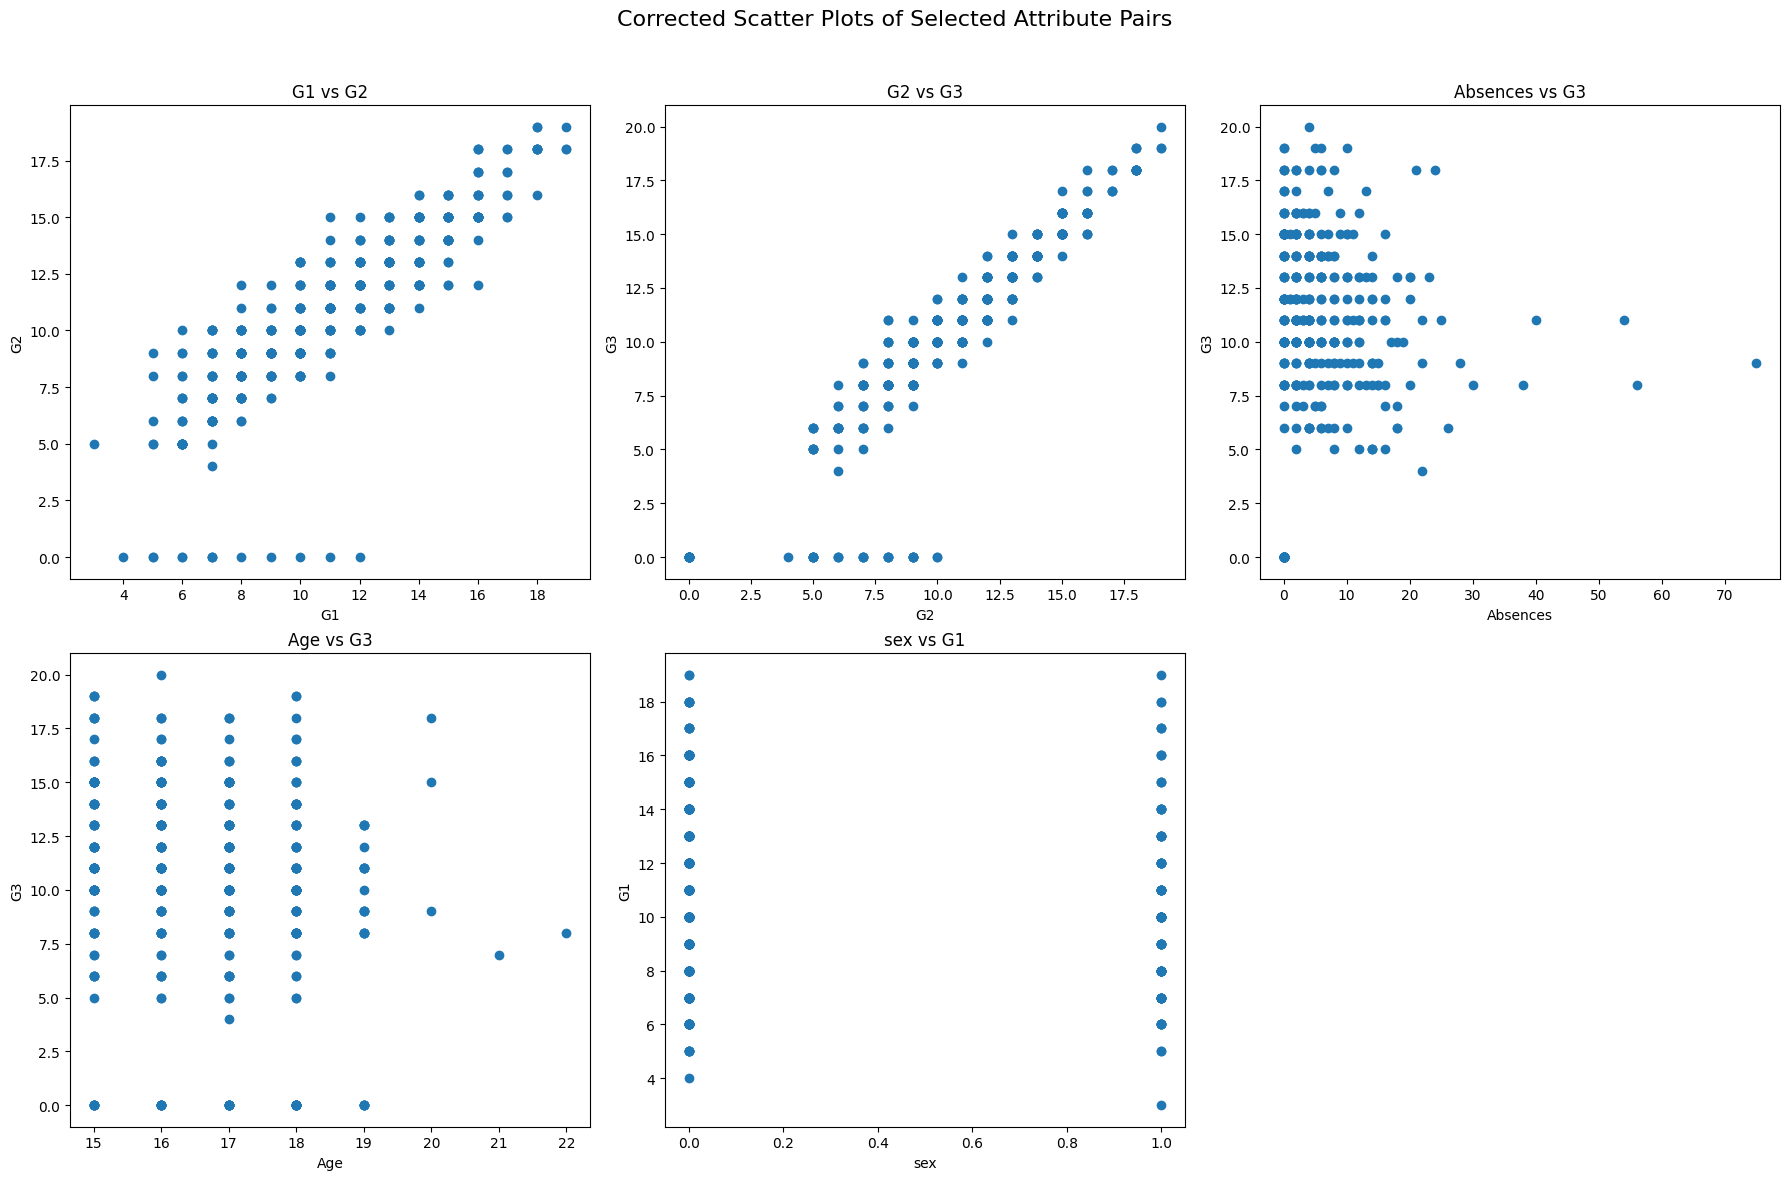

In [8]:
import matplotlib.pyplot as plt

# Convert the data to a more usable format for plotting
data_matrix = [[float(row[i]) for i in range(len(row))] for row in encoded_data]

# Extract specific columns for plotting
# Choosing pairs based on intuition about potential relationships in a student dataset
pairs = [
    (30, 31, "G1 vs G2"),  # First and second period grades
    (31, 32, "G2 vs G3"),  # Second and third period grades
    (29, 32, "Absences vs G3"),  # Student absences vs final grade
    (2, 32, "Age vs G3"),  # Corrected Age vs final grade (assuming Age is the 3rd column in the original data)
    (3, 30, "sex vs G1")  # Quality of family relationships vs free time
]

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Keep the 2x3 grid for layout consistency
axs = axs.flatten()

for i, (x, y, title) in enumerate(pairs):
    axs[i].scatter([row[x] for row in data_matrix], [row[y] for row in data_matrix])
    axs[i].set_xlabel(title.split(' vs ')[0])
    axs[i].set_ylabel(title.split(' vs ')[1])
    axs[i].set_title(title)

axs[-1].axis('off')

# Adjust layout and remove empty subplot (if any)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Corrected Scatter Plots of Selected Attribute Pairs', fontsize=16)
plt.show()

### Comparisons and Expected Correlations

- **G1 vs G2 (First and Second Period Grades):** This plot shows a positive correlation, indicating that students' performances tend to be consistent across these periods. There's a clustering of points along a line that demonstrates a positive relationship, suggesting that students who perform well in the first period are likely to do similarly in the second period. There are a series of students who have poor performance in G1 paired with a 0 in G3. Due to the fact that our dataset says there are no missing values I can only assume these students are slackers.

- **G2 vs G3 (Second and Third Period Grades):** Similar to the G1 vs G2 comparison, this plot is shows a positive correlation. It reflects consistency in student performance across periods, with the scatter plot likely indicating that second period grades are a good predictor of third period grades. There is a similar anomaly in that some students have a 0 grade in G3.

- **Absences vs G3 (Student Absences vs Final Grade):** A negative correlation is seen here, hypothesizing that more absences could result in lower final grades due to missed lessons and materials. The scatter plot has some one outlier where a student has zero abscences and a 0 grade. Past a certain point, however, students don't get grades below a certain point on average. 

- **Age vs G3 (Age vs Final Grade):** The relationship here is more complex, with a hypothesis that older students (possibly repeating a year) have middling performance patterns. The plot appears to reveal simply a general spread implying little correlation.

- **Sex vs G1 (The gender of the students vs First period Grades):** There appears to be little effect on the sex of the student and their overall grade. With 0 being female and 1 being male the only difference is male has a slightly lower lowest grade value. 


[3 points] Which range-normalized numerical attributes have the greatest sample covariance?
What is their sample covariance? Create a scatter plot of these range-normalized attributes.

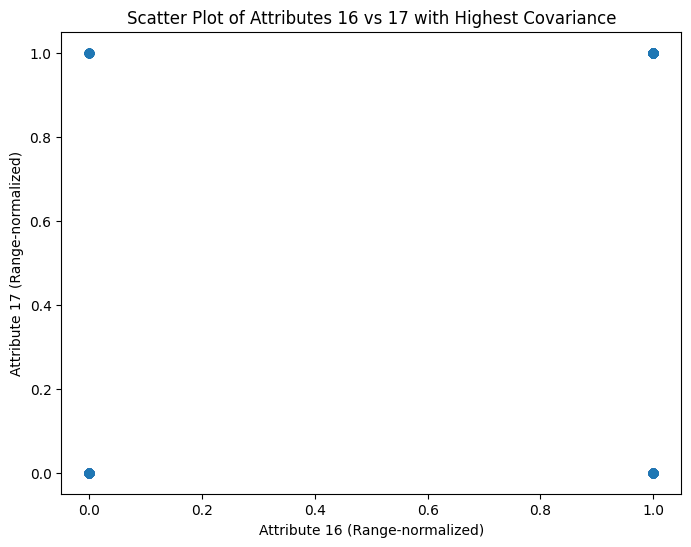

greatest sample covariance:  0.0713422861916083
max pair values:  (16, 17)  or famsup and paid


In [9]:
# Range-normalize the dataset
normalized_data = range_normalization(data_matrix)

# Compute sample covariance for each pair of range-normalized attributes and find the pair with the greatest covariance
max_covariance = None
max_pair = None

for i in range(len(normalized_data[0])):
    for j in range(i+1, len(normalized_data[0])):
        cov = sample_covariance([row[i] for row in normalized_data], [row[j] for row in normalized_data])
        if max_covariance is None or cov > max_covariance:
            max_covariance = cov
            max_pair = (i, j)

# Scatter plot of the attributes with the greatest sample covariance
plt.figure(figsize=(8, 6))
plt.scatter([row[max_pair[0]] for row in normalized_data], [row[max_pair[1]] for row in normalized_data])
plt.xlabel(f'Attribute {max_pair[0]} (Range-normalized)')
plt.ylabel(f'Attribute {max_pair[1]} (Range-normalized)')
plt.title(f'Scatter Plot of Attributes {max_pair[0]} vs {max_pair[1]} with Highest Covariance')
plt.show()

print("greatest sample covariance: ", max_covariance)
print("max pair values: ", max_pair, " or famsup and paid")

The above code is assuming this question also falls under the "(where categorical data
have been converted to numerical values)" category but in the case that it doesn't (I will ask in class) the fixed version is below.

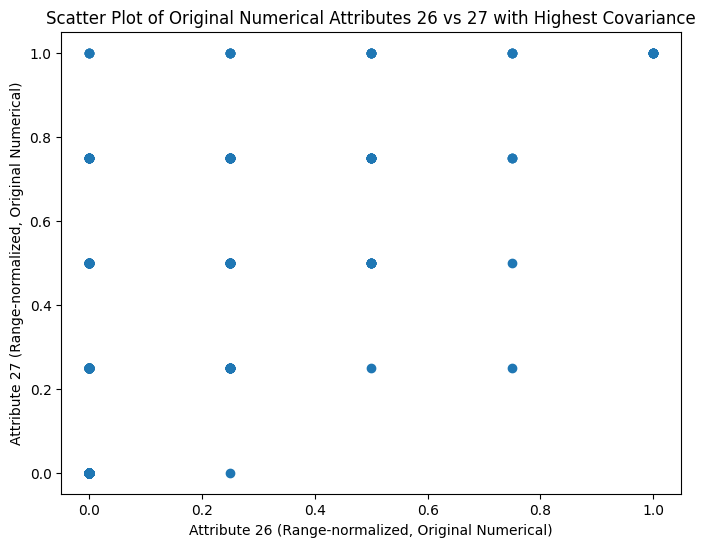

greatest sample covariance:  0.04642822720555163
max pair values:  (26, 27)  or Dalc (workday alcohol consumption) and Walc (weekend alcohol consumption)


In [10]:
original_numerical_indices = [2, 6, 7, 12, 13, 14, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

# Extract only the originally numerical data for range normalization
original_numerical_data = [[row[i] for i in original_numerical_indices] for row in data_matrix]

# Range-normalize the originally numerical dataset
normalized_original_numerical_data = range_normalization(original_numerical_data)

# Compute sample covariance for each pair of range-normalized original numerical attributes
# and find the pair with the greatest covariance, ignoring previously categorical attributes
max_covariance_original = None
max_pair_original = None

for i in range(len(normalized_original_numerical_data[0])):
    for j in range(i+1, len(normalized_original_numerical_data[0])):
        cov = sample_covariance([row[i] for row in normalized_original_numerical_data], [row[j] for row in normalized_original_numerical_data])
        if max_covariance_original is None or cov > max_covariance_original:
            max_covariance_original = cov
            max_pair_original = (original_numerical_indices[i], original_numerical_indices[j])

# Scatter plot of the attributes with the greatest sample covariance among originally numerical attributes
plt.figure(figsize=(8, 6))
plt.scatter([row[max_pair_original[0]] for row in normalized_data], [row[max_pair_original[1]] for row in normalized_data])
plt.xlabel(f'Attribute {max_pair_original[0]} (Range-normalized, Original Numerical)')
plt.ylabel(f'Attribute {max_pair_original[1]} (Range-normalized, Original Numerical)')
plt.title(f'Scatter Plot of Original Numerical Attributes {max_pair_original[0]} vs {max_pair_original[1]} with Highest Covariance')
plt.show()

print("greatest sample covariance: ", max_covariance_original)
print("max pair values: ", max_pair_original, " or Dalc (workday alcohol consumption) and Walc (weekend alcohol consumption)")

[3 points] Which Z-score-normalized numerical attributes have the greatest correlation? What
is their correlation? Create a scatter plot of these Z-score-normalized attributes.

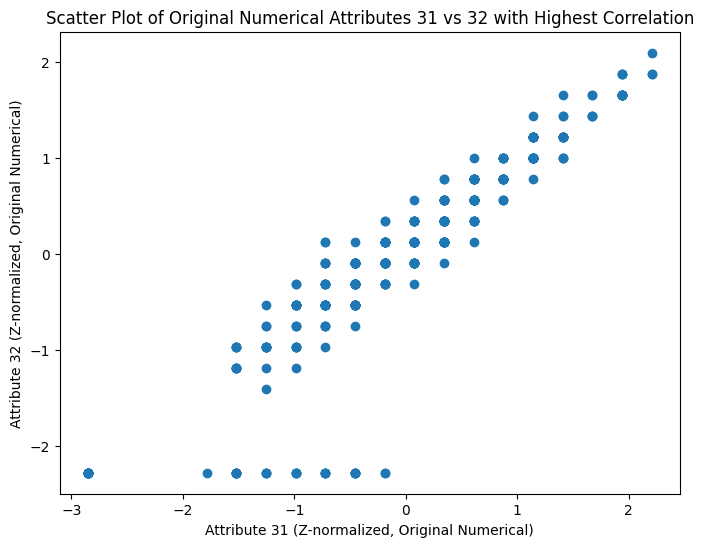

Z-score-normalized numerical attributes greatest correlation:  0.9048679892693012
Z-score-normalized numerical attributes have the greatest correlation (31, 32) or G2 and G3


In [11]:
z_normalized_original_numerical_data = standard_normalization(original_numerical_data)

max_correlation = None
max_pair_correlation = None
max_pair_correlation_indices = None

for i in range(len(z_normalized_original_numerical_data[0])):
    for j in range(i+1, len(z_normalized_original_numerical_data[0])):
        corr = correlation([row[i] for row in z_normalized_original_numerical_data], [row[j] for row in z_normalized_original_numerical_data])
        if max_correlation is None or corr > max_correlation:
            max_correlation = corr
            max_pair_correlation_indices = (i, j)  # Corrected indices for the Z-normalized data
            max_pair_correlation = (original_numerical_indices[i], original_numerical_indices[j])

# Corrected scatter plot using the Z-score-normalized data and the corrected indices
plt.figure(figsize=(8, 6))
plt.scatter([row[max_pair_correlation_indices[0]] for row in z_normalized_original_numerical_data], [row[max_pair_correlation_indices[1]] for row in z_normalized_original_numerical_data])
plt.xlabel(f'Attribute {max_pair_correlation[0]} (Z-normalized, Original Numerical)')
plt.ylabel(f'Attribute {max_pair_correlation[1]} (Z-normalized, Original Numerical)')
plt.title(f'Scatter Plot of Original Numerical Attributes {max_pair_correlation[0]} vs {max_pair_correlation[1]} with Highest Correlation')
plt.show()

print("Z-score-normalized numerical attributes greatest correlation: ", max_correlation)
print("Z-score-normalized numerical attributes have the greatest correlation", max_pair_correlation, "or G2 and G3")

[3 points] Which Z-score-normalized numerical attributes have the smallest correlation? What
is their correlation? Create a scatter plot of these Z-score-normalized attributes.

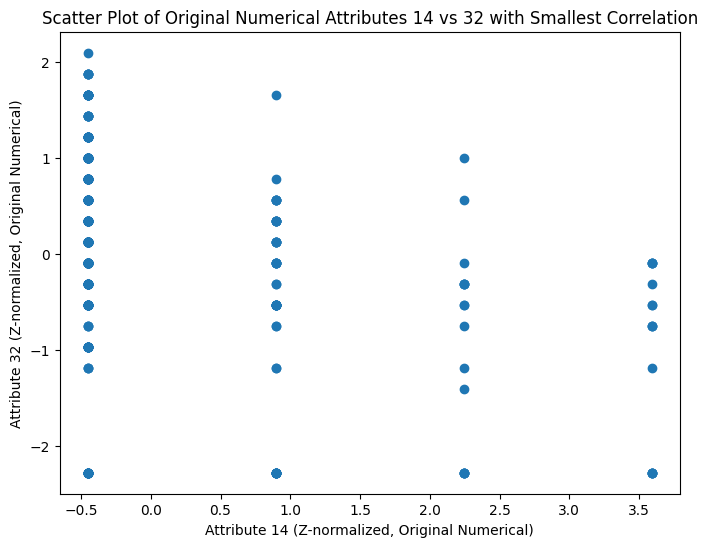

Z-score-normalized numerical attributes least correlation:  -0.36041494046165
Z-score-normalized numerical attributes have the least correlation (14, 32) or G3 and failures


In [12]:
# Find the pair of Z-score-normalized original numerical attributes with the smallest correlation
min_correlation = None
min_pair_correlation = None
min_pair_correlation_indices = None

for i in range(len(z_normalized_original_numerical_data[0])):
    for j in range(i+1, len(z_normalized_original_numerical_data[0])):
        corr = correlation([row[i] for row in z_normalized_original_numerical_data], [row[j] for row in z_normalized_original_numerical_data])
        if min_correlation is None or corr < min_correlation:
            min_correlation = corr
            min_pair_correlation_indices = (i, j)  # Corrected indices for the Z-normalized data
            min_pair_correlation = (original_numerical_indices[i], original_numerical_indices[j])

# Scatter plot of the attributes with the smallest correlation among Z-score-normalized original numerical attributes
plt.figure(figsize=(8, 6))
plt.scatter([row[min_pair_correlation_indices[0]] for row in z_normalized_original_numerical_data], [row[min_pair_correlation_indices[1]] for row in z_normalized_original_numerical_data])
plt.xlabel(f'Attribute {min_pair_correlation[0]} (Z-normalized, Original Numerical)')
plt.ylabel(f'Attribute {min_pair_correlation[1]} (Z-normalized, Original Numerical)')
plt.title(f'Scatter Plot of Original Numerical Attributes {min_pair_correlation[0]} vs {min_pair_correlation[1]} with Smallest Correlation')
plt.show()

print("Z-score-normalized numerical attributes least correlation: ", min_correlation)
print("Z-score-normalized numerical attributes have the least correlation", min_pair_correlation, "or G3 and failures")

[3 points] How many pairs of features have correlation greater than or equal to 0.5?

In [13]:
# Count the number of pairs of features with correlation greater than or equal to 0.5
count_correlation = sum(
    1 for i in range(len(z_normalized_original_numerical_data[0]))
    for j in range(i+1, len(z_normalized_original_numerical_data[0]))
    if correlation([row[i] for row in z_normalized_original_numerical_data], [row[j] for row in z_normalized_original_numerical_data]) >= 0.5
)

print("There are ", count_correlation, " pairs of features have correlation greater than or equal to 0.5")

There are  5  pairs of features have correlation greater than or equal to 0.5


[3 points] How many pairs of features have negative sample covariance?

In [14]:
# Count the number of pairs of features with negative sample covariance
count_negative_covariance = sum(
    1 for i in range(len(z_normalized_original_numerical_data[0]))
    for j in range(i+1, len(z_normalized_original_numerical_data[0]))
    if sample_covariance([row[i] for row in z_normalized_original_numerical_data], [row[j] for row in z_normalized_original_numerical_data]) < 0
)

print("There are ", count_negative_covariance, " pairs of features with negative sample covariance")

There are  58  pairs of features with negative sample covariance


[2 points] What is the total variance of the data?

In [15]:
# Compute the total variance of the Z-score-normalized original numerical data
total_variance = sum(
    sum((x - mean) ** 2 for x in column) / (len(z_normalized_original_numerical_data) - 1)
    for mean, column in zip([sum(column) / len(z_normalized_original_numerical_data) for column in zip(*z_normalized_original_numerical_data)], zip(*z_normalized_original_numerical_data))
)

print("The total variance of the Z-score normalized original numerical data: ", total_variance)

The total variance of the Z-score normalized original numerical data:  16.04060913705584


[2 points] What is the total variance of the data, restricted to the five features that have the
greatest sample variance?

In [16]:
sample_variances = [
    sum((x - mean) ** 2 for x in column) / (len(z_normalized_original_numerical_data) - 1)
    for mean, column in zip([sum(column) / len(z_normalized_original_numerical_data) for column in zip(*z_normalized_original_numerical_data)], zip(*z_normalized_original_numerical_data))
]

# Find the indices of the five features with the greatest sample variance
indices_greatest_variances = sorted(range(len(sample_variances)), key=lambda i: sample_variances[i], reverse=True)[:5]

# Compute the total variance of the data restricted to these five features
total_variance_top_5 = sum(sample_variances[i] for i in indices_greatest_variances)

print("The total variance of the data, restricted to the five features with the greatest sample variance, is approximately: ", total_variance_top_5)
print("These 5 features are: ", indices_greatest_variances, " or failures, Dalc, famrel, age, and Walc")

The total variance of the data, restricted to the five features with the greatest sample variance, is approximately:  5.0126903553299496
These 5 features are:  [5, 0, 2, 3, 4]  or failures, Dalc, famrel, age, and Walc


# Student Performance Analysis

The analysis of our student performance dataset offers a comprehensive examination by incorporating both numerical data and categorical variables converted into numbers for analytical comparison. This approach enables a nuanced understanding of how various factors interconnect and differ among students. A closer examination reveals several key findings:

Grades across different periods, specifically from G1 to G2 and G2 to G3, demonstrate a discernible pattern: students' performance in one period tends to forecast their achievement in subsequent periods. However, anomalies were observed where some students received a final grade of 0, suggesting potential gaps in data or unique challenges faced by these individuals. The relationship between students' absences and their final grades (G3) generally aligns with the expectation that higher absences correlate with lower grades, yet exceptions to this trend highlight complexities beyond mere attendance.

Interestingly, the analysis did not uncover a clear trend between a student's age and their final grades (G3), indicating that age may not be a significant determinant of academic success. Moreover, the investigation into the impact of a student's sex on their grades (Sex vs G1) revealed minimal difference, with a slight observation that boys may have a marginally lower range of grades at the lower end.

Delving deeper into the data, the strongest correlation was found between students' alcohol consumption during weekdays and weekends (Dalc and Walc), revealing a consistent pattern where increased weekday drinking is mirrored on weekends. The most reliable predictor of final grades emerged as students' performance in the second period (G2 vs G3), showcasing a high consistency in outcomes. Conversely, the weakest link was identified between the number of times a student failed and their final grade (Failures vs G3), indicating that failures are often accompanied by lower grades.

The analysis identified five pairs of factors with a strong correlation, suggesting significant co-movement. However, it also revealed 58 pairs of factors with inverse relationships, underscoring a broad spectrum of contrasting interactions within the dataset. An overall data spread of approximately 16.04 was noted, but focusing on the five most variable factors—failures, weekday drinking, familial relationships, age, and weekend drinking—reduced the spread to about 5.01. This refinement highlights the predominant elements contributing to student performance disparities.



---

## **Works Cited**

- Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

---
## Make sure the following criteria is filled:


- Your submission must include the complete written report and all associated code.
Ensure that your code is well-commented to facilitate understanding of the methods used
to generate your results.
- The full names of all members should be included in the first page of the report as well
as name of the file (it can include only last names).
- The team size must be between 2-4 members.
- Each team is required to submit their report and code only once per team, and the same
team member should submit on both D2L and GradeScope platforms. Multiple submission
by same person is allowed.
- The submission on GradeScope will be the primary document for grading purposes.
- To clarify individual contributions, please prefix your initials before each question (or part)
to indicate who worked on each problem.
- Please be aware of the following points, as failure to comply will result in a deduction of
points:
    * teams with fewer than 2 or more than 4 members.
    * Missing partners name on either the report or file name
    * Multiple submissions by the same team, even if identical.
    * Different versions of the report submitted by various team members
    * If your report does not include the necessary code, or if the code provided is not appropriately attached as a supplementary document or as inline code following each question.
    * Reports that are disorganized, unreadable, or contain excessive unrelated code
Missing initials for each question.